### Instrucciones generales <a class="tocSkip"></a>
1. Forme un grupo de **máximo dos estudiantes**
1. Copie este notebook y **modifique el nombre de archivo** agregando los apellidos de ambos miembros. Por ejemplo si los miembros del grupo son Pablo Huijse y Ana Nuñez el nombre sería: `info147_tarea1_huijse_nuñez.ipynb`
1. Versione su trabajo usando un **repositorio privado de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña Puede agregar a su compañero en la pestaña *Settings/Manage access*
1. Sean leales y honestos, no copie los resultados de otros grupos, el único afectado es usted
1. Entregue el notebook con sus respuestas antes del plazo final al correo: phuijse@inf.uach.cl

# Tarea 1: Explorando datos mundiales de COVID-19 <a class="tocSkip"></a>

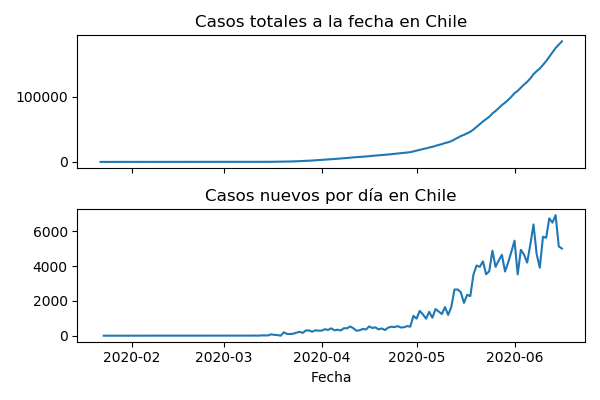


En esta actividad exploraremos la [base de datos de COVID-19 mantenida por la universidad John Hopkins](https://github.com/CSSEGISandData/COVID-19)

Utilice la versión con datos al 16 de Junio que se encuentra adjunto a este notebook en el archivo `data.zip`

Luego de descomprimir deberían observar cuatro archivos

Cada fila de estos archivos corresponde a un país y una región en particular con su latitud, longitud y una serie de tiempo de:

- `covid19_confirmados.csv` : Número de casos totales reportados como COVID-19 positivos
- `covid19_recuperados.csv` : Número de casos totales reportados como recuperados (podría ser considerablemente al valor real)
- `covid19_muertes.csv` : Número de decesos totales por COVID-19

El cuarto archivo `población_mundial.csv` contiene la población por país al 2020 más otros indicadores



> En cada sección de este cuadernillo encontrará instrucciones y preguntas

> Lea cuidadosamente los enunciados y complete con sus respuestas y resultados

> Escriba las rutinas de Python necesarias para resolver los problemas de cada punto. Use las librerías vistas en el curso, se evaluará el resultado pero también la eficiencia de su solución

In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt

## Preparación de datos (1.5pt)

### Análisis preliminar

Considere el archivo `covid19_confirmados.csv` y conteste

- Use `head` para mostrar las tres primeras filas
- Use `cat` y `wc` para contar el número de filas del archivo
- Responda ¿A que corresponden las filas y columnas?  
- Responda ¿Qué tipo es más adecuado para cada columna?

In [2]:
!head -n 3 covid19_confirmados.csv
#!cat covid19_confirmados.csv
#!wc -l covid19_confirmados.csv
#PREGUNTA 1
#PREGUNTA 2           (CON MARKDOWN)

Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/

### Cree un primer DataFrame a partir de `covid19_confirmados.csv` 

1. Utilize el nombre de pais como índice principal
1. Elimine las columnas `Lat` y `Long`
1. Use TimeStamps para los "nombres de columna" asociados a fechas
1. Reduzca la columna `Province/State`, el DataFrame resultante debe tener los totales a nivel país

### Cree un segundo DataFrame a partir `poblacion_mundial.csv`

1. Utilice el nombre de pais como índice principal
1. Elimina todas las columnas excepto `Population`

### Haga un `merge` de ambos DataFrames
1. Asigne un valor de `Population` a los elementos de primer DataFrame
1. Descarte las filas que no recibieron un valor de población

In [3]:
def transform_csv(archivo):
    df_covid = pd.read_csv(archivo)
    df_covid.columns = ["Province/State",
                        "Country/Region",
                        "Lat",
                        "Long"] + [pd.to_datetime(x) for x in df_covid.columns[4:]
                       ]

    df_covid.set_index(keys=["Country/Region", "Province/State"], inplace=True)
    mask = df_covid.columns[2:]
    df_covid = df_covid.groupby("Country/Region").aggregate(np.sum)[mask]
    
    return df_covid


df_confirm = transform_csv("covid19_confirmados.csv")
display(df_confirm)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-11,2020-06-12,2020-06-13,2020-06-14,2020-06-15,2020-06-16
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,0,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,0,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,0,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,0,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,472,473,481,485,487,489,489,492,505,514
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,0,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885


In [4]:
df_pop = pd.read_csv("población_mundial.csv", 
                     index_col="Country",
                     usecols=[0, 1]
                    ).sort_values(by="Country")
df_confirm = pd.concat([df_pop,df_confirm], axis=1, join="inner", ignore_index=False)
df_confirm

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,20342,20917,21459,22142,22890,23546,24102,24766,25527,26310
Albania,2878420,0,0,0,0,0,0,0,0,0,...,1246,1263,1299,1341,1385,1416,1464,1521,1590,1672
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,10154,10265,10382,10484,10589,10698,10810,10919,11031,11147
Andorra,77240,0,0,0,0,0,0,0,0,0,...,852,852,852,852,852,853,853,853,853,854
Angola,32644783,0,0,0,0,0,0,0,0,0,...,91,92,96,113,118,130,138,140,142,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,2,2,2,2,2,2,2,2,...,331,332,332,332,332,333,334,334,334,334
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,484,496,524,560,591,632,705,728,844,885
Zambia,18273379,0,0,0,0,0,0,0,0,0,...,1089,1200,1200,1200,1200,1321,1357,1358,1382,1405


In [5]:
df_recup = transform_csv("covid19_recuperados.csv")
df_recup = pd.concat([df_pop,df_recup], axis=1, join="inner", ignore_index=False)
df_recup

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,1875,2171,2651,3013,3326,3928,4201,4725,5164,5508
Albania,2878420,0,0,0,0,0,0,0,0,0,...,938,945,960,980,1001,1034,1039,1044,1055,1064
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,6717,6799,6951,7074,7255,7322,7420,7606,7735,7842
Andorra,77240,0,0,0,0,0,0,0,0,0,...,744,751,757,759,780,781,781,781,789,789
Angola,32644783,0,0,0,0,0,0,0,0,0,...,24,38,38,40,41,42,61,61,64,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,0,0,0,0,0,0,0,0,...,307,316,316,320,321,323,323,323,323,325
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,8,8,8,8
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,28,39,53,79,91
Zambia,18273379,0,0,0,0,0,0,0,0,0,...,912,912,912,912,912,1104,1104,1122,1142,1142


In [6]:
df_muert = transform_csv("covid19_muertes.csv")
df_muert = pd.concat([df_pop,df_muert], axis=1, join="inner", ignore_index=False)
df_muert

,Population,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-06-07 00:00:00,2020-06-08 00:00:00,2020-06-09 00:00:00,2020-06-10 00:00:00,2020-06-11 00:00:00,2020-06-12 00:00:00,2020-06-13 00:00:00,2020-06-14 00:00:00,2020-06-15 00:00:00,2020-06-16 00:00:00
Afghanistan,38742911,0,0,0,0,0,0,0,0,0,...,357,369,384,405,426,446,451,471,478,491
Albania,2878420,0,0,0,0,0,0,0,0,0,...,34,34,34,34,35,36,36,36,36,37
Algeria,43685618,0,0,0,0,0,0,0,0,0,...,707,715,724,732,741,751,760,767,777,788
Andorra,77240,0,0,0,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,52
Angola,32644783,0,0,0,0,0,0,0,0,0,...,4,4,4,4,5,5,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,97160127,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Sahara,594215,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,29687214,0,0,0,0,0,0,0,0,0,...,112,112,127,129,136,139,160,164,208,214
Zambia,18273379,0,0,0,0,0,0,0,0,0,...,7,10,10,10,10,10,10,11,11,11


> Repita el procedimiento anterior para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`

## Análisis global (2pt)

Calcule la cantidad total mundial a la fecha (16 de Junio) de los casos 
- confirmados
- cerrados: recuperados + decesos
- activos: confirmados - cerrados

In [7]:
#Confirmados
confir = df_confirm.iloc[:,-1].sum()
display(confir)
#Cerrados
muert = df_muert.iloc[:,-1].sum()
recup = df_recup.iloc[:,-1].sum()
cer = muert + recup
display(cer)
#Activos
act = confir - cer
display(act)

8154452

4385993

3768459

En base a estas cantidades calcule el porcentaje de 
- casos activos con respecto al total de confirmados
- decesos con respecto al total de casos cerrados
- recuperados con respecto al total de casos cerrados


In [8]:
per_1 = ((act*100)/confir)
display(per_1)
per_2 = ((muert*100)/cer)
display(per_2)
per_3 = ((recup*100)/cer)
display(per_3)

46.21351624854742

10.105784482556174

89.89421551744383

Muestre gráficas a nivel mundial de
- la cantidad de **casos confirmados nuevos** por día
- la cantidad de **recuperados nuevos** por día
- la cantidad de **decesos nuevos** por día

<IPython.core.display.Javascript object>


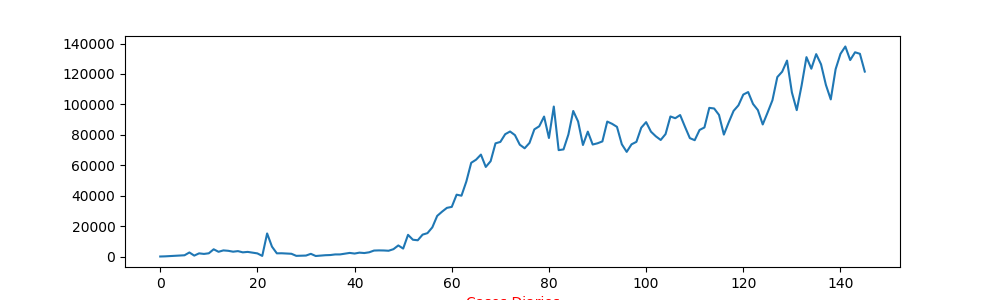

In [20]:
casos_dia=[0]
for i in range (2,df_confirm.shape[1]-1):
    casos_dia.append(df_confirm.iloc[:,i].sum()-df_confirm.iloc[:,i-1].sum())
casos_dia=np.array(casos_dia)
fig, ax = plt.subplots(figsize=(10, 3), facecolor='w')
ax.plot(casos_dia)
ax.set_xlabel(r'Casos Diarios', color="red");

<IPython.core.display.Javascript object>


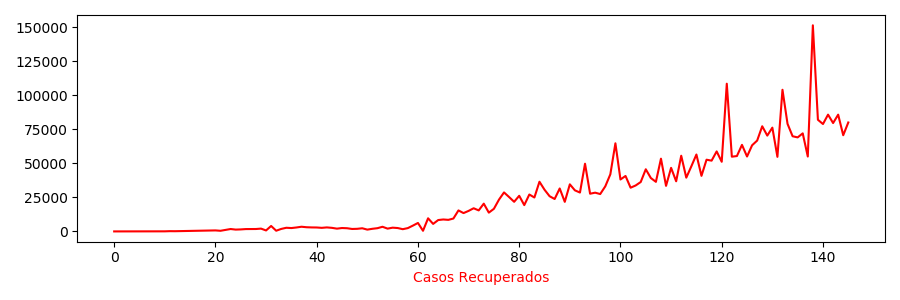

In [23]:
casos_dia_recup=[0]
for i in range (2,df_recup.shape[1]-1):
    casos_dia_recup.append(df_recup.iloc[:,i].sum()-df_recup.iloc[:,i-1].sum())
casos_dia_recup=np.array(casos_dia_recup)
fig2, ax2 = plt.subplots(figsize=(9, 3), tight_layout=True, facecolor='w')
ax2.plot(casos_dia_recup, c = 'red')
ax2.set_xlabel(r'Casos Recuperados', color="red");

<IPython.core.display.Javascript object>


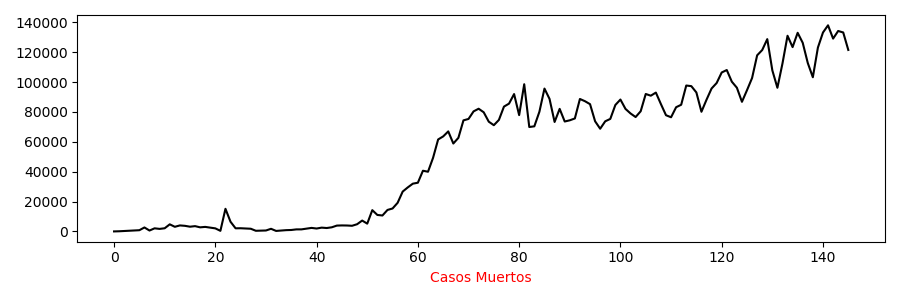

In [24]:
casos_dia_muert=[0]
for i in range (2,df_muert.shape[1]-1):
    casos_dia_muert.append(df_muert.iloc[:,i].sum()-df_muert.iloc[:,i-1].sum())
casos_dia_muert=np.array(casos_dia_muert)
fig3, ax3 = plt.subplots(figsize=(9, 3), tight_layout=True, facecolor='w')
ax3.plot(casos_dia, c='black')
ax3.set_xlabel(r'Casos Muertos', color="red");

Encuentre y muestre los nombres y los valores de los 5 paises que a la fecha tienen
- La mayor tasa de incidencia (confirmados por 100.000 dividido población)
- La menor tasa de incidencia 
- La mayor tasa de recuperación (recuperados por 100.000 dividido población)
- La menor tasa de recuperación 
- La mayor tasa de mortalidad (decesos por 100.000 divido población)
- La menor tasa de mortalidad 

¿En qué lugar se encuentra Chile con respecto a cada una de estas métricas? ¿A qué paises se parece más? Discuta y comente sobre sus hallazgos

## Análisis comparativo (2.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib`

- La interfaz debe incluir dos controles para escoger dos paises entre los paises pertenecientes a la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos)
- La interfaz debe mostrar tres gráficos con la evolución temporal de casos confirmados, recuperados y decesos en ambos paises 
- La interfaz debe tener un control que permita escoger entre valores totales acumulados, valores totales diarios y tasas por 100.000 habitantes


En base a su interfaz estudie el caso de Chile contra dos paises de la OCDE seleccionados por usted y comente sobre lo que observa

## BONUS (Opcional)

Implemente una app web a partir de su interfaz desarrollada en el punto anterior en base a jupyter widgets usando [viola](https://github.com/voila-dashboards/voila) y [heroku](https://github.com/voila-dashboards/voila-heroku)

Escriba acá el link a su app web